In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 학습된 모델 가져오기
!cp /content/drive/MyDrive/Final/MobileNet-32-20-0.77.h5 foodmodel.h5

In [21]:
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import os

from foodmodel_module2 import * # 모델 활용을 위한 모듈 import

In [ ]:
# 이미지셋 준비
!unzip "/content/drive/MyDrive/AI_images/kfood50_imageSet.zip"

In [5]:
## 이미지셋 로드시 필요한 변수 지정
imgSet_path = 'kfood50_imageSet/'
train_path = imgSet_path + 'train/'
valid_path = imgSet_path + 'validation/'
test_path = imgSet_path + 'test/'

img_height = 224
img_width = 224
batch_size = 32

food_classes = 50 # 음식 종류 수

In [20]:
datagen = ImageDataGenerator(rescale=1./255)

# 학습 데이터셋
train_generator = datagen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# 검증 데이터셋 - 학습시 일반화 성능 확인 
valid_generator = datagen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# 테스트 데이터셋 - 학습된 모델 정확도 확인
test_generator = datagen.flow_from_directory(
    test_path,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 37500 images belonging to 50 classes.
Found 7500 images belonging to 50 classes.
Found 5000 images belonging to 50 classes.


In [6]:
model = load_foodmodel() # 모델 가져오기
foodDict = load_foodDict() # 음식 종류 가져오기
print(foodDict)

{'0': '고사리나물무침', '1': '달걀국', '2': '닭개장', '3': '삼겹살구이', '4': '소고기무국', '5': '숙주나물무침', '6': '시금치나물무침', '7': '시래기된장국', '8': '훈제오리', '9': '갈비탕', '10': '갈치구이', '11': '감자조림', '12': '감자탕', '13': '건새우볶음', '14': '고등어구이', '15': '김치볶음밥', '16': '김치찌개', '17': '누룽지', '18': '동태찌개', '19': '된장찌개', '20': '두부김치', '21': '두부조림', '22': '떡갈비', '23': '떡볶이', '24': '멸치볶음', '25': '물냉면', '26': '미역국', '27': '북엇국', '28': '비빔냉면', '29': '비빔밥', '30': '삼계탕', '31': '새우볶음밥', '32': '새우튀김', '33': '소세지볶음', '34': '순두부찌개', '35': '알밥', '36': '애호박볶음', '37': '어묵볶음', '38': '오징어튀김', '39': '유부초밥', '40': '육개장', '41': '잡곡밥', '42': '제육볶음', '43': '주꾸미볶음', '44': '짜장면', '45': '짬뽕', '46': '쫄면', '47': '칼국수', '48': '콩나물국', '49': '황태구이'}


## 테스트 이미지로 모델 예측 결과 확인

In [12]:
# 테스트 이미지 가져오기
test_img = Image.open('test_image1.jpg').convert('RGB')
test_img = test_img.resize((img_height, img_width))
test_img = np.array(test_img)
print(test_img.shape)

(224, 224, 3)


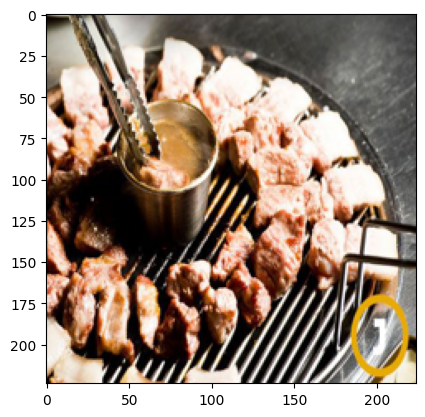

In [13]:
# 이미지 확인
def plot_img(img) :
    plt.imshow(img)
    plt.show()

plot_img(test_img)

In [18]:
# 예측 진행 및 결과 확인
pred = predict_one_food(foodDict, model, test_img)
print(pred)

1/1 [==============================] - 0s 62ms/step
삼겹살구이


(224, 224, 3)


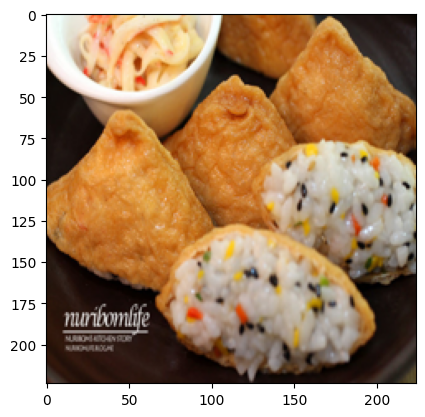

1/1 [==============================] - 0s 115ms/step
유부초밥


In [22]:
# 이미지 분류 테스트 한 번 더 진행
test_img = Image.open('test_image2.jpg').convert('RGB')
test_img = test_img.resize((img_height, img_width))
test_img = np.array(test_img)
print(test_img.shape)

plot_img(test_img)

pred = predict_one_food(foodDict, model, test_img)
print(pred)

In [93]:
# 테스트 이미지셋을 통한 손실값, 예측값 확인
loss, acc = model.evaluate(test_generator, verbose=1)
print('모델 loss: {:5f}'.format(loss))
print('모델 accuracy: {:5.2f}%'.format(100*acc))

157/157 [==============================] - 176s 1s/step - loss: 1.1865 - accuracy: 0.7692
모델 loss: 1.186464
모델 accuracy: 76.92%


In [97]:
# 테스트 이미지셋 예측
predictions = np.argmax(model.predict(test_generator), axis=1)

y_true = test_generator.labels # 정답 레이블
y_pred = predictions # 예측 레이블

# 모델 평가
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=foodDict.values(), zero_division=0)


157/157 [==============================] - 187s 1s/step


In [32]:
# 음식 분류 index 및 이름 확인
food_sr = pd.Series(foodDict.values(),
               index=foodDict.keys())
food_df = pd.DataFrame(food_sr)
food_df

,0
0,고사리나물무침
1,달걀국
2,닭개장
3,삼겹살구이
4,소고기무국
5,숙주나물무침
6,시금치나물무침
7,시래기된장국
8,훈제오리
9,갈비탕


## 모델 성능 평가 1 - 혼동행렬
- 전체 합이 100%가 되야 함
- 대각선에 해당하는 부분이 예측값과 실제값이 동일한 경우
- 각 분류별로 대각선 부분의 값이 2%가 나오면 완벽히 분류된 경우임

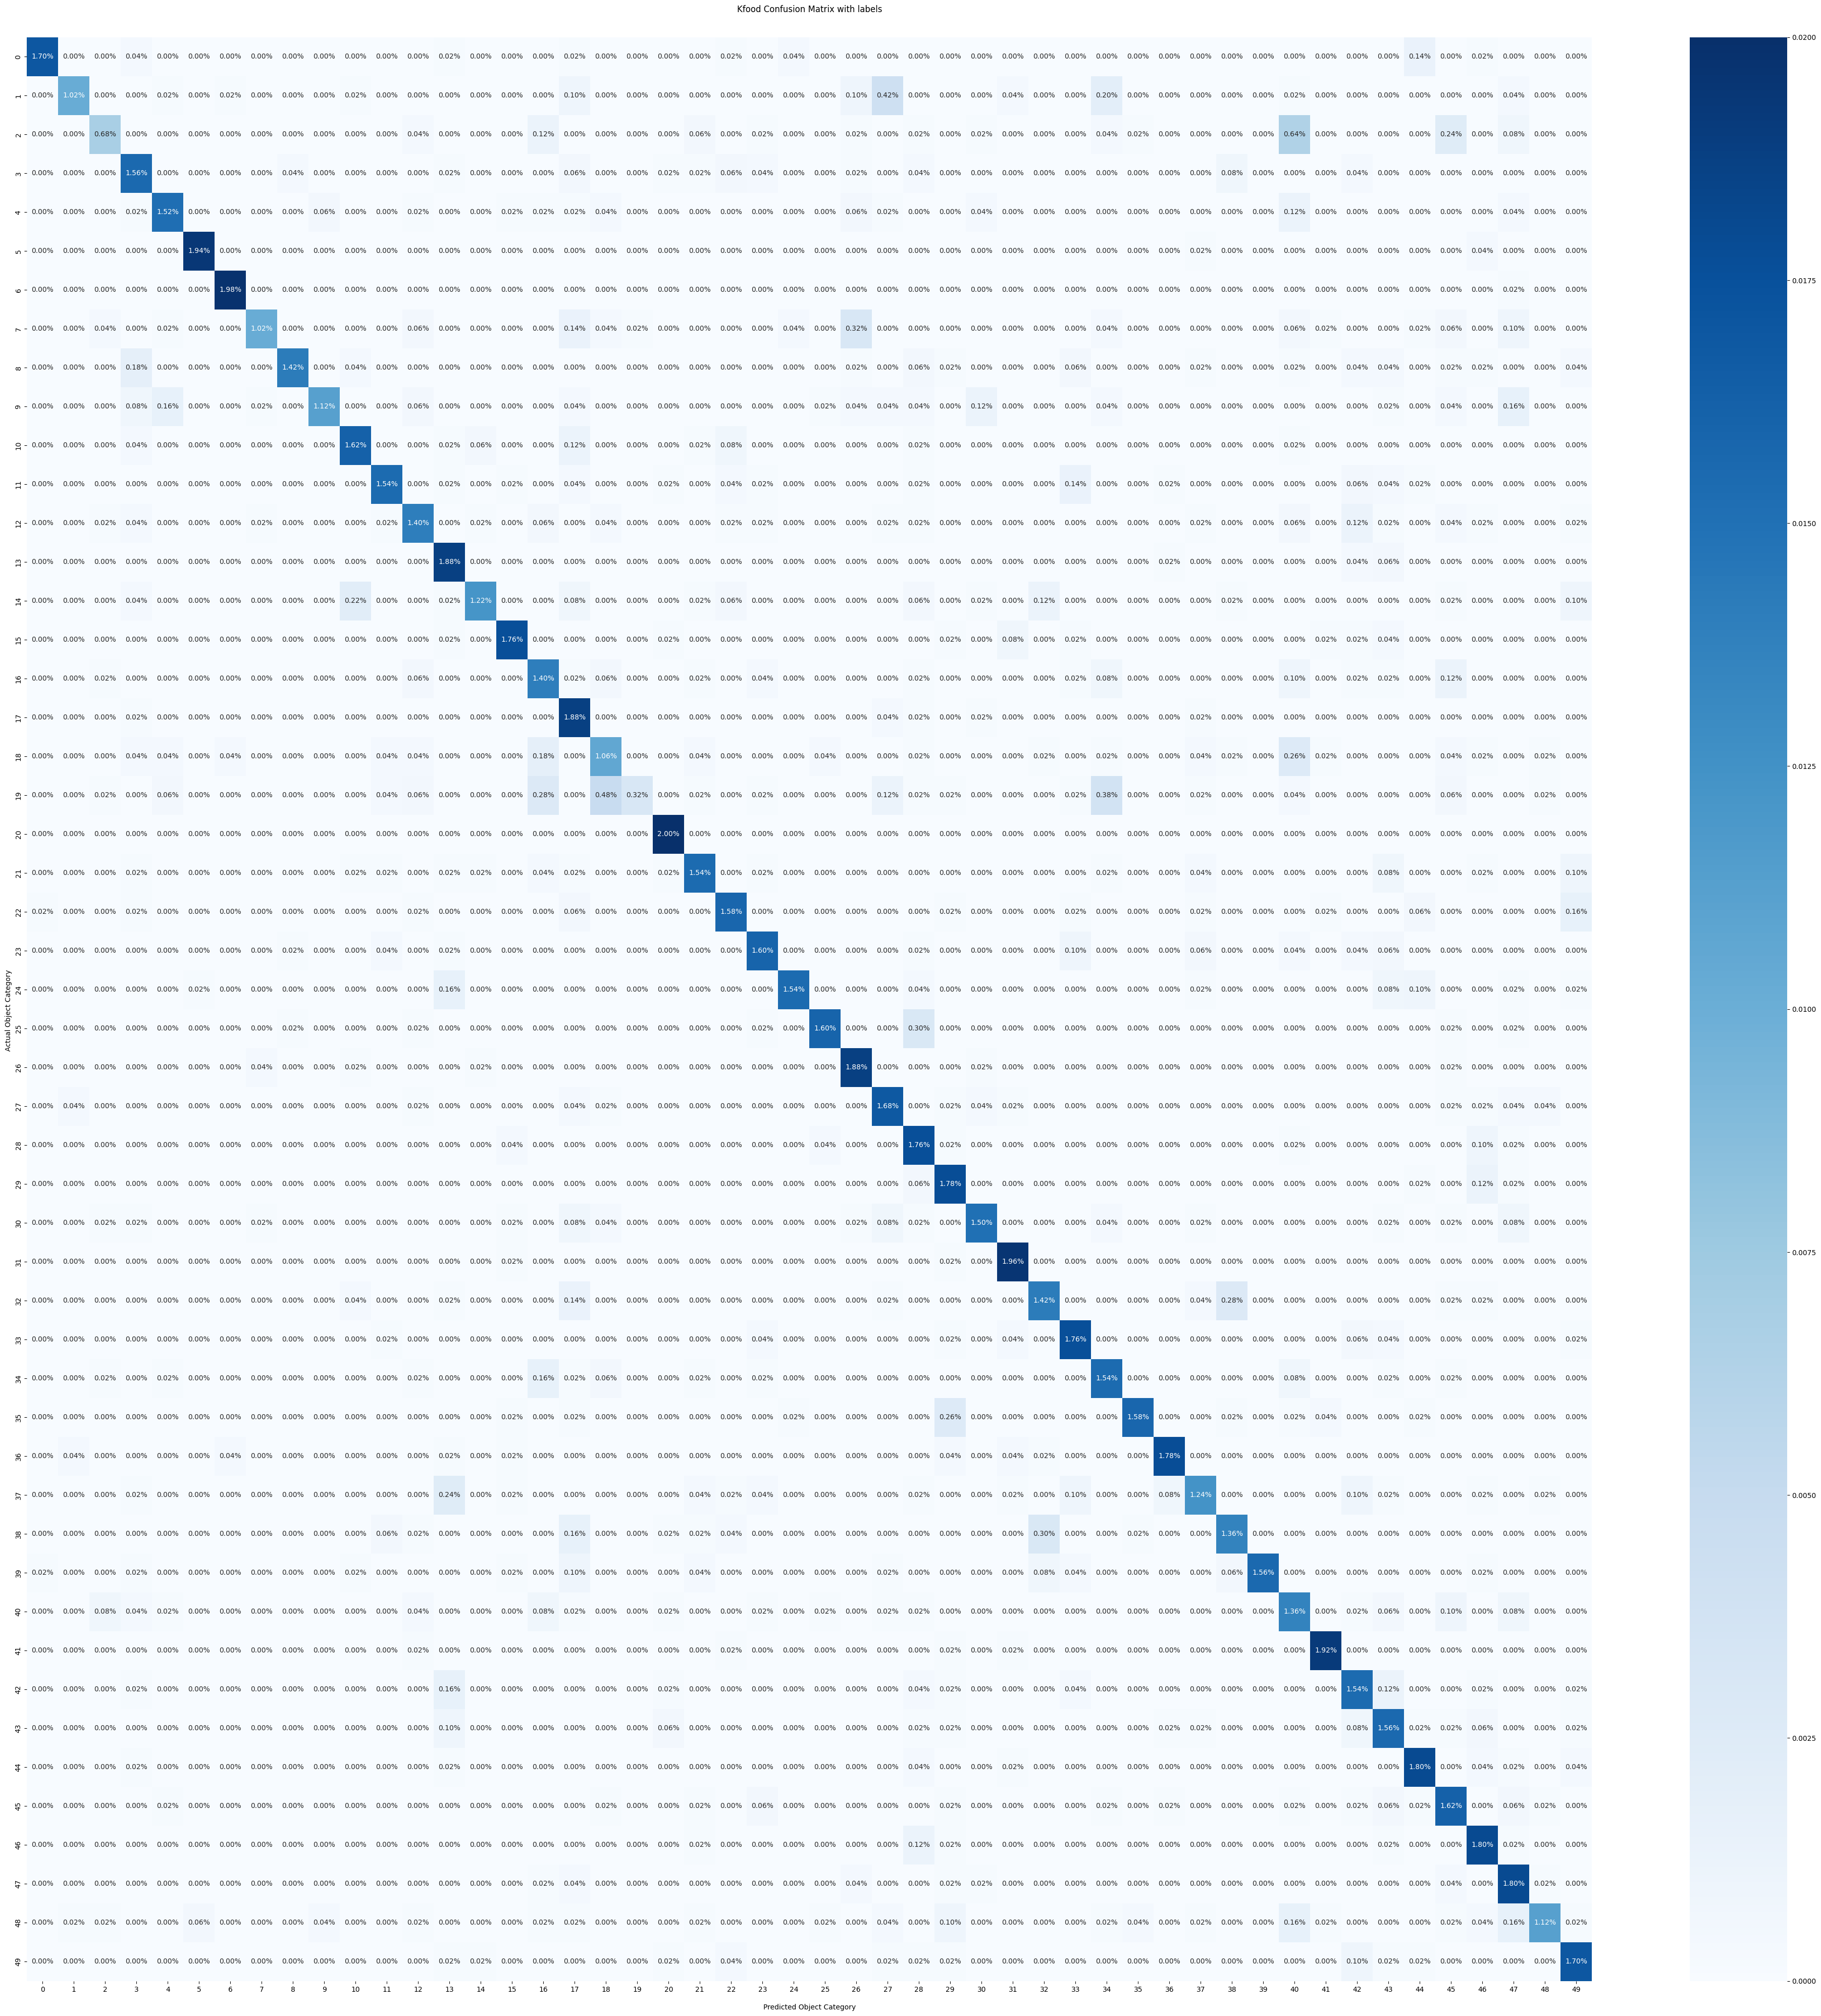


Accuracy: 0.77



In [98]:
# 성능 평가 1 - 혼동행력 확인
plt.figure(figsize=(50,50))
ax = sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%',cmap='Blues')

ax.set_title('Kfood Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Object Category') # x축 : 예측 레이블
ax.set_ylabel('Actual Object Category '); # y축 : 실제 레이블

## Display the visualization of the Confusion Matrix.
plt.show()

accuracy = np.trace(cm)/len(y_true)
print('\nAccuracy: {:.2f}\n'.format(accuracy))

## 모델 성능 평가 2 - 분류 리포트 확인

In [99]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                    precision    recall  f1-score   support

 고사리나물무침       0.98      0.85      0.91       100
        달걀국       0.91      0.51      0.65       100
         닭개장       0.74      0.34      0.47       100
    삼겹살구이       0.70      0.78      0.74       100
      소고기무국       0.81      0.76      0.78       100
  숙주나물무침       0.96      0.97      0.97       100
시금치나물무침       0.95      0.99      0.97       100
  시래기된장국       0.91      0.51      0.65       100
        훈제오리       0.95      0.71      0.81       100
              갈비탕       0.92      0.56      0.70       100
             갈치구이       0.81      0.81      0.81       100
             감자조림       0.87      0.77      0.81       100
              감자탕       0.73      0.70      0.71       100
            건새우볶음       0.68      0.94      0.79       100
            고등어구이       0.90      0.61      0.73       100
        